In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PUNTO 1

In [37]:
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y,dtype=complex)
    #dt=1/(x[1]-x[0])
   # assert np.sqrt(2)<dt/2, "Frecuencia de la señal mayor al limite de Nysquic"
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)

## PUNTO 2 a

In [282]:
t_max=100
N=400
t=np.linspace(0,t_max,N)
f=lambda t:np.sin(2*np.pi*t*np.sqrt(2))
f_2=lambda t:np.sin(t) ###Prueba
y=f(t)
y_2=f(t) ###Prueba

In [343]:
Transformada_Fourier(t,y_2,0.1) ##Prueba

(0.7033663091899005-0.023275396684723004j)

## PUNTO 2 c

In [357]:
!pip install numba

In [360]:
f_0=1/(t[1]-t[0])
frecuencias=np.arange(0,f_0,0.01)
from numba import njit
#@njit
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y)+0j
    #dt=1/(x[1]-x[0])
   # assert np.sqrt(2)<dt/2, "Frecuencia de la señal mayor al limite de Nysquic"
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)
#@njit
def norma_transformada(frecuencias,t,y):
    F=np.zeros_like(frecuencias)
    for i,f in enumerate(frecuencias):
        F[i]=abs(Transformada_Fourier(t,y,f))
    return F
F=norma_transformada(frecuencias,t,y)

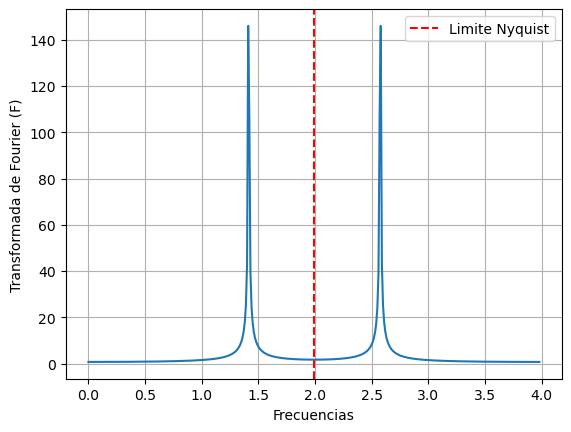

In [285]:
plt.plot(frecuencias,F)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(f_0/2,linestyle="--",color="r",label="Limite Nyquist")
plt.legend()
plt.grid()

## PUNTO 2 D

In [286]:
##Ruido
ruido=np.random.normal(0.0,0.1,N)
y_new=ruido+y

In [287]:
F_new=norma_transformada(frecuencias,t,y_new)

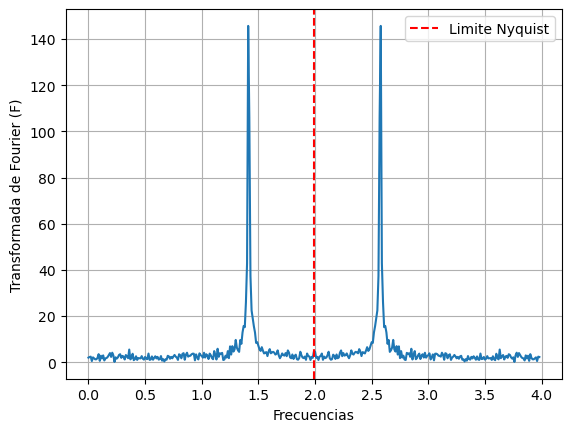

In [288]:
plt.plot(frecuencias,F_new)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(f_0/2,linestyle="--",color="r",label="Limite Nyquist")
plt.legend()
plt.grid()

Se evidencia una leve amplificación a las frecuencias bajas y ciertas variaciones en la grafica de Fourier respecto a frecuencia

In [289]:
def pico_FWHM(F,frecuencias):
    F2=F[:int(len(F)/2)]
    frecuencias_2=frecuencias[:int(len(F)/2)]
    indice_altura_max=np.where(F2==np.max(F2))
    altura_max=np.max(F2)
    altura_media=F2[indice_altura_max]/2.0
    resta=np.abs(F2-altura_media)
    valor_min=np.min(resta)
    resta_2=resta[resta>valor_min]
    valor_min_2=np.min(resta_2)
    i1=np.where(resta==valor_min)
    i2=np.where(resta==valor_min_2)
    distancia=np.abs(frecuencias[i1]-frecuencias[i2])
    return distancia[0], altura_max,indice_altura_max[0][0]

## PUNTO 3A

In [290]:
ancho,altura_maxima,posicion=pico_FWHM(F_new,frecuencias)
ancho,altura_maxima,posicion ##CORREGIR LAS TABLAS Y TEXTO

(0.019999999999999796, 145.657613003977, 141)


| N   | Ancho   | x   |
|-----|---------|-----|
| 100 | 0.006   | 285 |
| 200 | 0.059   | 284 |
| 500 | 0.059   | 283 |
| 700 | 0.059   | 283 |
| 800 | 0.059   | 283 |

### Resultados $3 B$ (sin cambiar \(N = 400\))

| \(t_{\max}\) | Ancho   | x    |
|--------------|---------|------|
| 5            | 0.24    | 71   |
| 10           | 0.119   | 142  |
| 20           | 0.059   | 283  |
| 50           | 0.023   | 709  |
| 100          | 0.011   | 1417 |

## PUNTO 4

In [291]:
N=80
ts_0=np.linspace(0,10,N)
ts=ts_0+np.random.normal(0.,0.01,N)
f=15
ys=np.sin(2*np.pi*ts*f)
dt=1/(ts[1]-ts[0])
nyquist=dt
nyquist

5.9747517567900985

In [292]:
Transformada_Fourier(ts,ys,nyquist)

(2.2040484717857436-2.574621521198241j)

In [299]:
frecuencias=np.linspace(0,4*dt,10*N)
Fs=norma_transformada(frecuencias,ts,ys)

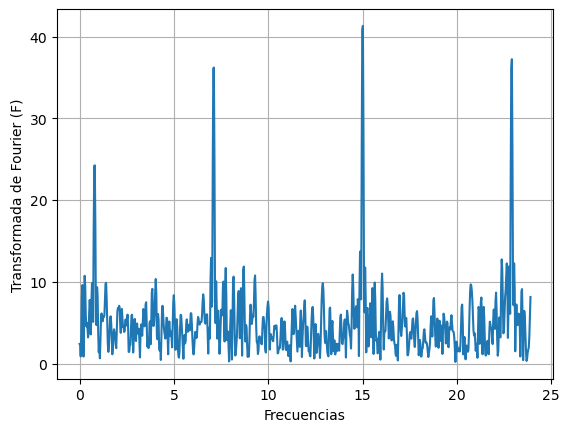

In [300]:
plt.plot(frecuencias,Fs)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.grid()

## PUNTO 5

In [385]:
import pandas as pd

In [403]:
data="https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
datos=pd.read_csv(data,delim_whitespace=True,header=None)
datos.columns=["t","y","$\sigma_y$"]
t_data=datos["t"]
y_data=datos["y"]
y_data-=np.mean(y_data)
frecuencias_data=np.arange(3,5,0.0001) 

In [404]:
F_data=norma_transformada(frecuencias_data,t_data,y_data)
i_max=np.where(F_data==np.max(F_data))
frecuencia_señal=frecuencias_data[i_max][0]
frecuencia_señal

3.259200000000547

$\textit{La frecuencia principal de la señal es: 3.26 Hz}$

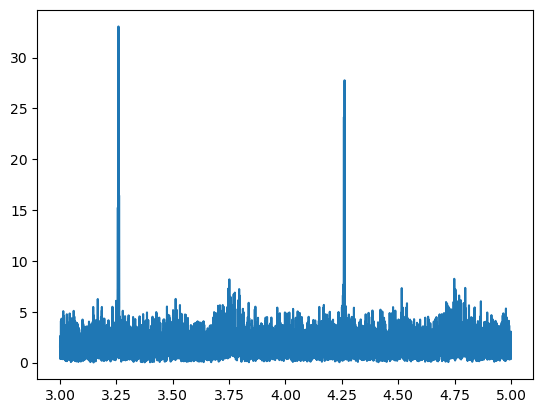

In [405]:
plt.plot(frecuencias_data,F_data)

In [406]:
phi=np.mod(t_data*frecuencia_señal,1)
phi

0      0.561185
1      0.085451
2      0.621586
3      0.591792
4      0.849330
         ...   
396    0.068436
397    0.565389
398    0.233944
399    0.194121
400    0.264016
Name: t, Length: 401, dtype: float64

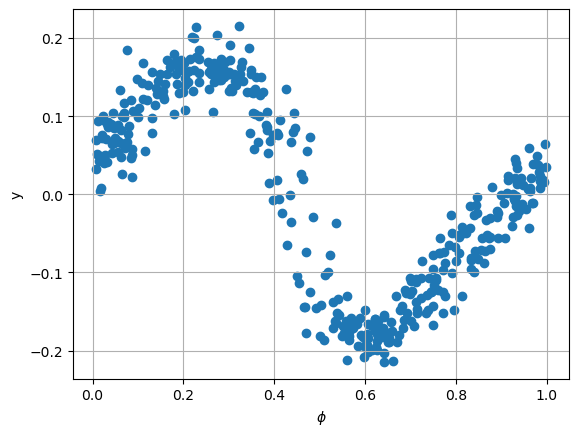

In [407]:
plt.scatter(phi,y_data)
plt.xlabel("$\phi$")
plt.ylabel("y")
plt.grid()